In [1]:
import sys
sys.path.append('/home/ubuntu/jjlee/jumpstart-rl/')


from experiments.gridworld import DiscreteGridworld, GoodOracleDiscrete, NeuralQLearningAgent, Buffer

import numpy as np
import random
from tqdm import tqdm

import wandb
from datetime import date

env = DiscreteGridworld(10, sparse=False, heatmap=True)
oracle = GoodOracleDiscrete(env)
agent = NeuralQLearningAgent(env)
training_iterations = range(1000)

buffer = Buffer()
horizons = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
horizon = len(horizons)-1

state = env.state
mean_reward = 0
mean_best_reward=0

def student_eval(env, agent, training_iterations, filename):

    state = env.reset(reset_heatmap=True)
    np_reward = np.zeros(len(training_iterations))
    np_dones = np.zeros(len(training_iterations))
    # run the training loop for the agent
    for i in training_iterations:
        cum_reward = 0
        for j in range(30):
            # Loop through training iterations online
            # Get the current state
            
            # Process the state data so that it returns the integer representation of where the agent is
            # find where the value occur in the 2d array of state and return the index
            # state = np.where(state == 1)
            # state = state[0][0] * env.grid_size + state[1][0]
            
            # Get the agent's action
            agent_action = agent.act(state) 
            
            # feed the action to the environment
            next_state, reward, done, truncate, info = env.step(agent_action)
            
            state = next_state
            cum_reward += reward
            
            if done:
                break
        np_reward[i] = cum_reward
        np_dones[i] = done
    # wandb.log({"mean_reward": np.mean(np_reward)})
    # wandb.log({"mean_dones": np.mean(np_dones)})
    if agent.Q is not None:
        env.render(save=True, filename=filename , qmap=True, q_table=agent.Q, show=False)
    else:
        print("called")
        # First extract the q table from the agent's network
        q_table = np.zeros((env.grid_size**2, env.action_space.n))
        for i in range(env.grid_size**2):
            # State is a 2d array size of grid x grid with agent's position marked as 1 and rest 0
            state = np.zeros((env.grid_size, env.grid_size))
            state[int(i/env.grid_size)][i%env.grid_size] = 1
            q_table[i] = agent.model.act(state)
        env.render(save=True, filename=filename , qmap=True, q_table=q_table, show=False)
    
# wandb.init(project="jsrl",
#                 entity="jsrl-boys",
#             config={"gridworld": "True"},
#             group=f"{date.today()}",
#             sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
#             monitor_gym=True,
#             dir="/ext_hdd/jjlee/jumpstart-rl/logs/pointmaze_jsrl_curriculum", 
#         )
    
for i in tqdm(training_iterations):
    for j in range(300):
        # Loop through training iterations online
        # Get the current state
        
        # Process the state data so that it returns the integer representation of where the agent is
        # find where the value occur in the 2d array of state and return the index
        # state = np.where(state == 1)
        # state = state[0][0] * env.grid_size + state[1][0]
        
        if j > horizons[horizon]:
            # Get the agent's action
            action = agent.act(state) 
        else:
            # Get the oracle's action 
            action = oracle.predict(state)
            
        # feed the action to the environment
        next_state, reward, done, truncate, info = env.step(action)
        
        
        # next_state_processed = np.where(next_state == 1)
        # next_state_processed = next_state_processed[0][0] * env.grid_size + next_state_processed[1][0]
        
        buffer.add([state, action, reward, next_state, done])
        
        
        state = next_state
        
        
        if done:
            state = env.reset(reset_heatmap=False)
            break
            
    if i != 0 and i % 10 == 0:
        samples = buffer.sample(10)
        for sample in samples:
            agent.learn(*sample)
            
    if i != 0 and i % 1000 == 0:
        mean_reward = env.evaluate(agent, 10)
        # print(mean_reward)
        # print(horizons[horizon])
        # print(mean_best_reward)
        student_eval(env, agent, training_iterations, f"arrow_q_{i}")
        if mean_reward > mean_best_reward:
            mean_best_reward = mean_reward
            horizon -= 1
            # print("Horizon decreased to {}".format(horizons[horizon]))
        # else:
            # print("Horizon kept at {}".format(horizons[horizon]))
        state = env.reset(reset_heatmap=True)
    # if i != 0 and i % (len(training_iterations)/10) == 0:
    #     horizon -= 1
        # env.render(save=True, filename=f"arrow_q_{i}" , qmap=True, q_table=agent.Q, show=True)
    



/home/ubuntu/miniforge3/envs/jsrl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1000 [00:00<?, ?it/s]/home/ubuntu/miniforge3/envs/jsrl/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 1000/1000 [07:10<00:00,  2.32it/s]


In [ ]:
# import sys
# sys.path.append('/home/ubuntu/jjlee/jumpstart-rl/')

# from experiments.gridworld import DiscreteGridworld, GoodOracleDiscrete, QLearningAgent

# import numpy as np

# env = DiscreteGridworld(20, heatmap=True)
# oracle = GoodOracleDiscrete(env)
# agent = QLearningAgent(env)
# training_iterations = range(1000000)

def student_eval(env, agent, training_iterations, filename):

    state = env.reset(reset_heatmap=True)

    # run the training loop for the agent
    for i in training_iterations:
        for j in range(300):
            # Loop through training iterations online
            # Get the current state
            
            # Process the state data so that it returns the integer representation of where the agent is
            # find where the value occur in the 2d array of state and return the index
            state = np.where(state == 1)
            state = state[0][0] * env.grid_size + state[1][0]
            
            # Get the agent's action
            agent_action = agent.act(state) 
            
            # feed the action to the environment
            next_state, reward, done, truncate, info = env.step(agent_action)
            
            state = next_state
            
            
            if done:
                break
    
    env.render(save=True, filename=filename, show=False)

In [ ]:
agent.Q

AttributeError: 'NeuralQLearningAgent' object has no attribute 'Q'

In [ ]:
import imageio

def create_gif(image_filenames, output_filename):
    images = []
    for filename in image_filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave(output_filename, images, duration=100)

# Usage:
image_filenames = ["arrow_q_{}.png".format((i+1)*1000) for i in range(99)]
create_gif(image_filenames, 'output.gif')

/tmp/ipykernel_1427757/2508418686.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


  0%|          | 0/100 [00:00<?, ?it/s]/home/ubuntu/jjlee/jumpstart-rl/experiments/gridworld.py:166: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = reward + self.gamma * self.q.forward(torch.tensor([torch.tensor(next_state), torch.tensor(next_action)], dtype=torch.float).T).to(torch.float)[0]
/home/ubuntu/miniforge3/envs/jsrl/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


-0.18403435
-0.18225323
-0.18033653
-0.1784188
-0.17650102
-0.17458327
-0.17266549
-0.17073683
-0.16873126
-0.16659328
-0.16445197
-0.16230941
-0.1601968
-0.1580842
-0.15597753
-0.15393068
-0.15209088
-0.15027545
-0.14846005
-0.14664462
-0.14486061
-0.14304653
-0.1411984
-0.13933061
-0.13738786
-0.13541402
-0.1334326
-0.1314494
-0.12945095
-0.12744404
-0.12544854
-0.123459935
-0.12147133
-0.11950712
-0.11751738
-0.115527615
-0.113537855
-0.1115481
-0.109598055
-0.10781473
-0.10591362
-0.10409026
-0.102445334
-0.10102397
-0.099843204
-0.09874153
-0.09768768
-0.096531525
-0.09549997
-0.09447202
-0.093488544
-0.09256266
-0.09169898
-0.09089066
-0.09008573
-0.08931516
-0.088576816
-0.08783847
-0.08699153
-0.08616904
-0.085277624
-0.08438623
-0.08344233
-0.08249019
-0.08153808
-0.08058596
-0.07963385
-0.078681715
-0.0777296
-0.076796524
-0.07586432
-0.07493212
-0.07390506
-0.07259184
-0.07122924
-0.06994331
-0.06858192
-0.06723263
-0.06577948
-0.06423846
-0.06270573
-0.06117268
-0.05972704


  1%|          | 1/100 [00:11<18:53, 11.45s/it]

0.14660908
0.14764944
0.14871597
0.14979991
0.15090066
0.15194951
0.15288651


 10%|█         | 10/100 [01:00<08:19,  5.55s/it]

-0.1226779
-0.120252095
-0.11779057
-0.11511075
-0.11239313
-0.10967555
-0.106957965
-0.10418906
-0.101336665
-0.09838232
-0.09542795
-0.09244082
-0.089419775
-0.08639872
-0.083392605
-0.08043106
-0.077556394
-0.074751265
-0.07191905
-0.06906109
-0.06613999
-0.063232906
-0.060317285
-0.05737327
-0.054429248
-0.051485218
-0.04854121
-0.045597203
-0.042484894
-0.03920632
-0.03589294
-0.03257954
-0.029266153
-0.025981165
-0.022696622
-0.019412097
-0.016065419
-0.012709003
-0.009352587
-0.0059887543
-0.0025643744
0.00080759823
0.004056981
0.0073063336
0.01043009
0.013459269
0.016355619
0.019304693
0.022339936
0.025368333
0.028102893
0.03070923
0.03331558
0.035921883
0.038528208
0.041132145
0.04372951
0.046326887
0.048924264
0.05150369
0.054091606
0.056740195
0.059388775
0.06203736
0.06468594
0.067392156
0.07010406
0.07281597
0.07552789
0.0782398
0.08095172
0.08366363
0.086375535
0.08908744
0.09179936
0.094582535
0.09762676
0.100851625
0.10407651
0.107301384
0.11052626
0.113751136
0.1169932

 11%|█         | 11/100 [01:11<10:52,  7.33s/it]

0.9000326
0.905035


 20%|██        | 20/100 [02:06<07:57,  5.97s/it]

0.8772031
0.8733702
0.8695372
0.86570424
0.8619579
0.8584822
0.8550065
0.85153085
0.8480951
0.8450519
0.84201586
0.83896583
0.8359157
0.8328657
0.8298136
0.8267598
0.82370603
0.8207545
0.8178243
0.81487334
0.81195074
0.8091425
0.806512
0.80369955
0.8008872
0.7980749
0.79532915
0.7926061
0.789974
0.7874669
0.7851816
0.7828963
0.7808039
0.77865696
0.7764997
0.77427137
0.772043
0.7698146
0.7675863
0.76539296
0.7633529
0.76124585
0.75897676
0.75670767
0.7542801
0.751846
0.74927545
0.7467323
0.7442924
0.7417114
0.73912215
0.7365329
0.7339437
0.7313544
0.72876513
0.7261759
0.7235286
0.7206993
0.7178701
0.7150408
0.71221155
0.7094066
0.706609
0.70381147
0.7010139
0.6982163
0.69550127
0.6928126
0.6901761
0.6877091
0.68529105
0.68310267
0.6809143
0.678726
0.6767285
0.6752049
0.6736812
0.67215747
0.6706338
0.6691102
0.66758657
0.66606283
0.6645392
0.6630155
0.6614919
0.65996814
0.6584445
0.6569208
0.6553972
0.65529007
0.6564784
0.657796
0.6597122
0.6621486
0.6645849
0.66702116
0.66977453
0.67348

 21%|██        | 21/100 [02:15<08:59,  6.83s/it]

2.508954
2.5235453
2.5380802
2.5525656


 30%|███       | 30/100 [03:05<06:28,  5.55s/it]

1.5763428
1.5696374
1.5631176
1.5565978
1.5500779
1.543941
1.5378855
1.5318301
1.5262868
1.5210199
1.5157528
1.5104858
1.505219
1.499952
1.4946841
1.4897187
1.4850515
1.4803845
1.4757173
1.4710615
1.4665912
1.462082
1.4578772
1.4537133
1.4495496
1.4453858
1.4414338
1.4374818
1.4333905
1.4292507
1.425111
1.4209713
1.417153
1.4137346
1.410461
1.407187
1.4039373
1.4010797
1.3982221
1.3953952
1.3926696
1.3898823
1.3869439
1.3840057
1.3808672
1.3776479
1.3745406
1.3714907
1.3685656
1.3657572
1.3629932
1.3600699
1.3571463
1.3542229
1.3512994
1.3483759
1.3454524
1.342529
1.3396056
1.336682
1.3337586
1.3308351
1.3279116
1.3250922
1.3223118
1.3195316
1.3167512
1.3139709
1.3113191
1.3087349
1.3061507
1.3035663
1.3009821
1.2983979
1.2958137
1.2932295
1.2906452
1.2880609
1.2854767
1.2828925
1.2803082
1.277724
1.2755609
1.2734289
1.2717631
1.2701547
1.2694824
1.2688098
1.2681372
1.2674648
1.2667922
1.2661197
1.2654471
1.2647748
1.2641022
1.2643826
1.2673573
1.2722843
1.2780398
1.2850245
1.2928021
1

 31%|███       | 31/100 [03:17<08:44,  7.60s/it]

4.093372


 40%|████      | 40/100 [04:09<05:51,  5.87s/it]

2.2002738
2.19112
2.1820886
2.1730573
2.164026
2.1549947
2.146141
2.1376219
2.1291556
2.1209018
2.1126478
2.104394
2.09646
2.0886967
2.0809386
2.0733356
2.0657814
2.0581975
2.0505915
2.0430639
2.035785
2.0285811
2.0213776
2.0141735
2.0069697
1.999766
1.9925622
1.9853306
1.9779403
1.97055
1.9632833
1.9565446
1.9500113
1.9433813
1.9370197
1.930681
1.9243424
1.9180038
1.9116652
1.9053397
1.8991201
1.8929701
1.8868197
1.8806694
1.8743272
1.8679061
1.8613524
1.8550417
1.8487747
1.8423288
1.8358827
1.8294365
1.8229907
1.8165445
1.8100986
1.8036525
1.7972066
1.7907608
1.7843146
1.7778685
1.7714674
1.765133
1.7587986
1.752464
1.7461294
1.7397947
1.7334602
1.7271258
1.7208698
1.7146202
1.7083708
1.7021213
1.6958718
1.6896223
1.6833727
1.6771233
1.6708738
1.6646242
1.6583748
1.6521252
1.6458758
1.6396263
1.6333767
1.6271273
1.6208777
1.6147711
1.6088613
1.6029515
1.5970416
1.5911862
1.5865356
1.5820954
1.5776552
1.573215
1.5687748
1.5643346
1.5598944
1.5554541
1.5515773
1.5489032
1.5501242
1.556

 41%|████      | 41/100 [04:18<06:35,  6.70s/it]

2.857782
2.8859715
2.914137
2.942225
2.9703112
2.998282
3.0258899
3.0534587
3.0806403
3.1074023
3.1339445
3.1601555
3.1863666
3.2125776
3.2388735
3.2651806
3.2914877
3.3177943
3.3441012
3.370408
3.396515
3.422166
3.447712
3.473258
3.4988039
3.5243497
3.5498958
3.5754416
3.600988
3.6265337
3.652081
3.6776147
3.703114
3.7285047
3.753818
3.7791314
3.8044214
3.8296683
3.8549147
3.88016
3.9053051
3.9301505
3.9549541
3.9793417
4.0038323
4.0284142
4.0530186
4.077484
4.101696
4.125448
4.1492124
4.172759
4.196189
4.219619
4.2429986
4.266334


 50%|█████     | 50/100 [05:08<04:41,  5.62s/it]

2.0478773
2.0415049
2.0351326
2.0287604
2.022388
2.016546
2.0107205
2.0048947
1.999121
1.9935538
1.9884235
1.9834224
1.9784212
1.9734201
1.9684232
1.9635341
1.9588672
1.9543036
1.9497229
1.9454453
1.9411825
1.9368433
1.9325039
1.9281647
1.9238254
1.9195033
1.9150156
1.9104908
1.9061482
1.9020634
1.8985063
1.8949981
1.8917848
1.888488
1.8851892
1.8818903
1.8785913
1.8752923
1.8721712
1.8691545
1.8662401
1.8632762
1.8601913
1.8571064
1.8539258
1.8507937
1.8473146
1.8438169
1.8404285
1.8370643
1.8337
1.8303356
1.8269712
1.823607
1.8202426
1.8168783
1.8135229
1.810286
1.8070493
1.8038125
1.8005757
1.797339
1.7941021
1.7908653
1.7876287
1.7843919
1.7812419
1.7781274
1.775013
1.7718983
1.7687838
1.7656692
1.7625548
1.7594402
1.7563257
1.7532113
1.7500966
1.746982
1.7438675
1.740753
1.7376385
1.7345238
1.7314093
1.7282948
1.7251803
1.7220657
1.7189817
1.7159197
1.7128578
1.709796
1.7067341
1.7036722
1.7014508
1.700087
1.7003198
1.7039939
1.7114284
1.7211814
1.7324955
1.7494193
1.7723349
1.796

 51%|█████     | 51/100 [05:18<05:43,  7.01s/it]

4.330271


 60%|██████    | 60/100 [06:08<03:47,  5.68s/it]

2.2727523
2.2667396
2.2609286
2.255059
2.2491891
2.2433193
2.2374604
2.2322376
2.2270703
2.2221258
2.2171812
2.2122366
2.207292
2.2029526
2.1987011
2.1944547
2.1904922
2.1865292
2.1825666
2.1786044
2.1747139
2.1712232
2.1678092
2.1643953
2.1609817
2.1575677
2.1541338
2.1505332
2.1469328
2.1433327
2.1397324
2.1367457
2.1342628
2.1317086
2.1294496
2.127305
2.1251912
2.123094
2.1209972
2.1189134
2.1169403
2.1149795
2.1131492
2.1113186
2.1092794
2.1071525
2.1048727
2.102719
2.1007855
2.098714
2.0966425
2.0945709
2.0924993
2.0904279
2.0883563
2.0862846
2.084213
2.0821416
2.0802195
2.078311
2.0764024
2.0744941
2.0725856
2.0706773
2.0687687
2.0668604
2.064952
2.063151
2.0613813
2.0596116
2.0578415
2.0560718
2.054302
2.052532
2.0507622
2.0489924
2.0472226
2.0454526
2.0436828
2.041913
2.0401433
2.0383735
2.0366037
2.0348337
2.033064
2.031294
2.0294456
2.0274673
2.0254889
2.0235105
2.021532
2.0195537
2.0175753
2.0155969
2.0136185
2.01164
2.0102804
2.0091276
2.0079746
2.0068219
2.0056694
2.006325

 61%|██████    | 61/100 [06:21<05:01,  7.73s/it]

4.8368964
4.86027
4.8835964


 70%|███████   | 70/100 [07:12<02:45,  5.52s/it]

2.8901572
2.8808455
2.8714895
2.8621345
2.852779
2.8434234
2.8346
2.8258595
2.8171768
2.8087268
2.8002763
2.791861
2.7837172
2.7758956
2.768116
2.7605543
2.7529926
2.7454305
2.7378688
2.7303033
2.7228432
2.715808
2.7087827
2.7017574
2.6947184
2.6876736
2.6804276
2.6731677
2.6659079
2.658648
2.6513882
2.6448288
2.6386733
2.6323643
2.626392
2.6204195
2.6144729
2.6085482
2.602624
2.596713
2.5909662
2.585414
2.5797253
2.5740366
2.568129
2.562129
2.5559688
2.5499148
2.5439243
2.537963
2.5320015
2.5260396
2.5200782
2.5141168
2.5081553
2.502194
2.4962325
2.4903626
2.4845257
2.4786882
2.4728513
2.4670143
2.4611769
2.45534
2.449503
2.4436655
2.4378285
2.4320002
2.4261823
2.4203649
2.4145474
2.4087305
2.4029126
2.3970952
2.3912778
2.3854609
2.3796434
2.3738256
2.3680081
2.3621907
2.3563733
2.350556
2.3447385
2.338921
2.3328204
2.326717
2.320613
2.314509
2.3084044
2.302301
2.296197
2.290093
2.283989
2.277885
2.271781
2.265677
2.259573
2.253469
2.247365
2.2456608
2.254604
2.2697444
2.29147
2.32328

 71%|███████   | 71/100 [07:23<03:28,  7.17s/it]

4.5257545
4.54695
4.568133
4.5891566
4.610188
4.6312375
4.652433
4.6736765
4.6948614
4.715581
4.736049
4.756602
4.777164
4.7976923
4.8181987
4.838705
4.859033
4.8793063


 80%|████████  | 80/100 [08:14<01:56,  5.81s/it]

2.8917243
2.8849413
2.878444
2.871885
2.8652616
2.8586383
2.8523176
2.8464065
2.8405557
2.8349442
2.829333
2.823722
2.8182056
2.8129642
2.8080928
2.8034084
2.7988963
2.7943835
2.789871
2.7853587
2.780809
2.776165
2.7723284
2.7685018
2.7646754
2.7608488
2.756859
2.7527978
2.7487366
2.7446752
2.7406137
2.736789
2.7339175
2.731037
2.7282846
2.725846
2.723407
2.7209685
2.7185602
2.716184
2.7139218
2.7116015
2.709487
2.7073872
2.7050545
2.7026222
2.7000144
2.6974723
2.6949174
2.6925879
2.6902583
2.6879284
2.6855986
2.6832693
2.6809394
2.67861
2.6763575
2.6741989
2.6720405
2.669882
2.667724
2.6655653
2.6634068
2.6612484
2.65909
2.6569316
2.654773
2.6526368
2.650541
2.6484458
2.6463501
2.6442547
2.6421592
2.6400638
2.6379683
2.6358726
2.6337774
2.6316817
2.6295865
2.6274908
2.6253953
2.6232998
2.6212044
2.619109
2.6165311
2.613631
2.6107304
2.6078303
2.60493
2.6020296
2.5991292
2.5962288
2.5933287
2.590428
2.587528
2.5846276
2.5817273
2.578827
2.5759265
2.5730262
2.570126
2.5674694
2.5708086


 81%|████████  | 81/100 [08:23<02:07,  6.72s/it]

4.8276563
4.8483944
4.869131
4.889729
4.9102826
4.930845
4.9514184
4.9721217
4.9928946
5.013694
5.033979
5.0539646
5.074036
5.094117
5.114168
5.134199
5.15413
5.173969
5.1937594


 90%|█████████ | 90/100 [09:15<00:59,  5.93s/it]

3.2762895
3.270759
3.2652292
3.2596984
3.254168
3.24898
3.244124
3.2392678
3.2344737
3.2299275
3.2254162
3.221294
3.217298
3.213654
3.2101402
3.2068758
3.2036119
3.200347
3.197144
3.1941814
3.1912704
3.1888251
3.1863804
3.1839347
3.18149
3.1789875
3.1763315
3.1736512
3.1709714
3.168291
3.1660528
3.1647983
3.1637368
3.162888
3.162115
3.1613503
3.1606264
3.159902
3.1591783
3.1586103
3.1584287
3.1581874
3.157802
3.1574173
3.1567883
3.1560545
3.155108
3.154336
3.1537232
3.1531448
3.152566
3.1519876
3.1514087
3.1508303
3.1504488
3.1500783
3.1497083
3.1493378
3.1489673
3.1485972
3.1482267
3.1478567
3.1474867
3.1471162
3.1467457
3.1463757
3.1460052
3.145691
3.1453943
3.1450977
3.1448016
3.144505
3.1442084
3.1439123
3.1436157
3.1433191
3.143023
3.1427264
3.1424298
3.1421337
3.1418371
3.1415405
3.141244
3.1409478
3.1406512
3.1403546
3.1395507
3.1379333
3.1363163
3.1346989
3.1330814
3.131464
3.1298466
3.1282296
3.1266122
3.1249948
3.1233778
3.122757
3.1237583
3.1289191
3.1385489
3.1483617
3.1656

 91%|█████████ | 91/100 [09:26<01:07,  7.48s/it]

5.4042497
5.4218316
5.4393606
5.4568458


100%|██████████| 100/100 [10:17<00:00,  6.17s/it]


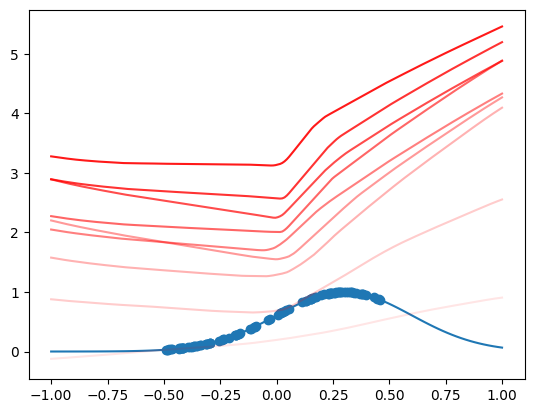

In [3]:
import sys
sys.path.append('/home/ubuntu/jjlee/jumpstart-rl/')


from experiments.gridworld import NeuralActorCriticAgent, Buffer
from experiments.simple_continuous import SimpleContinuous

import numpy as np
import random
from tqdm import tqdm

import wandb
from datetime import date

import torch

env = SimpleContinuous()
env.observation_space.n = env.observation_space.shape[0]
env.action_space.n = env.action_space.shape[0]
agent = NeuralActorCriticAgent(env)
training_iterations = range(100)

buffer = Buffer()
horizons = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
horizon = len(horizons)-1

state = env.state
mean_reward = 0
mean_best_reward=0

q_tables = []


def overestimation_eval(env, agent, training_iterations, filename):
    # Run through the actions form -1 to 1 and calculate the q values every 0.01 step
    
    # First extract the q table from the agent's network
    q_table = []
    for i in range(-100,100,1):
        # There is only one state in this environment
        state = env.reset()
        action = np.array([i/100])
        input = torch.cat((torch.tensor(state), torch.tensor(action)), 0).float()
        q = agent.q.forward(input).detach().numpy()[0]
        print(q)
        q_table.append(q)
        
    return q_table

# Offline Loop
# Fill the buffer with randomly sampled action between -.5 and .5
# for i in tqdm(range(100)):
#     # Loop through training iterations online
#     # Get the current state
    
#     # Process the state data so that it returns the integer representation of where the agent is
#     # find where the value occur in the 2d array of state and return the index
#     # state = np.where(state == 1)
#     # state = state[0][0] * env.grid_size + state[1][0]
    
#     action = random.uniform(-.5, .5)
        
#     # feed the action to the environment
#     next_state, reward, done, info = env.step(action)
    
#     buffer.add([state, action, reward, next_state, done])
    
#     state = next_state
    
#     if done:
#         state = env.reset()
#         break
    

# # No more data collecting, overfit the model to the buffer
# q_tables = []
# for i in tqdm(training_iterations):
#     # Loop through the training iterations offline
#     # Sample from the buffer
#     samples = buffer.sample(10)
#     for sample in samples:
#         agent.learn(*sample)
        
#     if i % 10 == 0:
#         q_table = overestimation_eval(env, agent, training_iterations, f"overestimation_q_{i}")
#         q_tables.append(q_table)

# JSRL Loop
# wandb.init(project="jsrl",

#             config={"gridworld": "True"},
#             group=f"{date.today()}",
#             sync_tensorboard=True,  # auto-upload sb3's tensorboard metrics
#             monitor_gym=True,
#             dir="/ext_hdd/jjlee/jumpstart-rl/logs/pointmaze_jsrl_curriculum",
#         )

# Online Learning Loop without Buffer
# for i in tqdm(training_iterations):
#     for j in range(30):
#         # Loop through training iterations online
#         # Get the current state
        
#         # Process the state data so that it returns the integer representation of where the agent is
#         # find where the value occur in the 2d array of state and return the index
#         # state = np.where(state == 1)
#         # state = state[0][0] * env.grid_size + state[1][0]
        
#         state = torch.tensor(state, dtype=torch.float32)
#         action, parameters = agent.act(state) 
#         mean, var = parameters
#         action = torch.tensor(action, dtype=torch.float32)

#         # feed the action to the environment
#         next_state, reward, done, info = env.step(action)
#         action = action.detach().float()
#         reward = reward.detach().float()
        
#         # Get the float value out of the tensor
#         action = action.item()
#         reward = reward.item()
        

#         # next_state_processed = np.where(next_state == 1)
#         # next_state_processed = next_state_processed[0][0] * env.grid_size + next_state_processed[1][0]
#         buffer.add([state, action, reward, next_state, done, mean, var])
        
            
#     if i != 0 and i % 10 == 0:
#         samples = buffer.sample(10)
#         for sample in samples:
#             q_loss, policy_loss=agent.learn(*sample)
#         # mean_reward = env.evaluate(agent, 10)
#         # Add q values to the q_tables
#         q_table = overestimation_eval(env, agent, training_iterations, f"overestimation_q_{i}")
#         q_tables.append(q_table)
#         # student_eval(env, agent, training_iterations, f"arrow_q_{i}")
#         horizon -= 1
#             # print("Horizon decreased to {}".format(horizons[horizon]))
#         # else:
#             # print("Horizon kept at {}".format(horizons[horizon]))
#         state = env.reset()
#     # if i != 0 and i % (len(training_iterations)/

# JSRL Loop
for i in tqdm(training_iterations):
    for j in range(30):
        # Loop through training iterations online
        # Get the current state
        
        # Process the state data so that it returns the integer representation of where the agent is
        # find where the value occur in the 2d array of state and return the index
        # state = np.where(state == 1)
        # state = state[0][0] * env.grid_size + state[1][0]
        
        if j > horizons[horizon]:
            # Get the agent's action
            state = torch.tensor(state, dtype=torch.float32)
            action, parameters = agent.act(state) 
            mean, var = parameters
            action = torch.tensor(action, dtype=torch.float32)
        else:
            # Get the oracle's action 
            action = torch.tensor(0.3, dtype=torch.float32)
            mean = torch.tensor(0.3, dtype=torch.float32)
            var = torch.tensor(0.3, dtype=torch.float32)
            
        # feed the action to the environment
        next_state, reward, done, info = env.step(action)
        action = action.detach().float()
        reward = reward.detach().float()
        
        # Get the float value out of the tensor
        action = action.item()
        reward = reward.item()

        # next_state_processed = np.where(next_state == 1)
        # next_state_processed = next_state_processed[0][0] * env.grid_size + next_state_processed[1][0]
        
        buffer.add([state, action, reward, next_state, done, mean, var])
        
        
        state = next_state
        
        
        if done:
            state = env.reset()
            break
            
    if i != 0 and i % 10 == 0:
        samples = buffer.sample(10)
        for sample in samples:
            agent.learn(*sample)
            
    if i != 0 and i % 10 == 0:
        state = env.reset()
        mean_reward = 0
        for j in range(10):
            reward_count = 0
            for k in range(30):
                # Loop through training iterations online
                # Get the current state
                
                # Process the state data so that it returns the integer representation of where the agent is
                # find where the value occur in the 2d array of state and return the index
                state = torch.tensor(state, dtype=torch.float32)
                action, parameters = agent.act(state) 
                mean, var = parameters
                action = torch.tensor(action, dtype=torch.float32)

                # feed the action to the environment
                next_state, reward, done, info = env.step(action)
                action = action.detach().float()
                reward = reward.detach().float()
                
                # Get the float value out of the tensor
                action = action.item()
                reward = reward.item()
                
                state = next_state
                reward_count += reward
                if done:
                    break
            mean_reward += reward_count/10.0
        # Add q values to the q_tables
        q_table = overestimation_eval(env, agent, training_iterations, f"overestimation_q_{i}")
        q_tables.append(q_table)
        # student_eval(env, agent, training_iterations, f"arrow_q_{i}")
        if mean_reward > mean_best_reward:
            mean_best_reward = mean_reward
            horizon -= 1
            # print("Horizon decreased to {}".format(horizons[horizon]))
        # else:
            # print("Horizon kept at {}".format(horizons[horizon]))
        state = env.reset()
    # if i != 0 and i % (len(training_iterations)/10) == 0:
    #     horizon -= 1
        # env.render(save=True, filename=f"arrow_q_{i}" , qmap=True, q_table=agent.Q, show=True)
        
# Plot the buffer distribution with y axis as reward and x axis as action
import matplotlib.pyplot as plt
import numpy as np

samples = buffer.sample(1000)
actions = []
rewards = []
for sample in samples:
    actions.append(sample[1])
    rewards.append(sample[2])
    
plt.scatter(actions, rewards)
# Plot the Gaussian function that has a center at 0.3 and std of 0.3
# Plot it from -1 to 1 on x axis
x = np.linspace(-1, 1, 100)
plt.plot(x, np.exp(-((x-0.3)**2)/(2*0.3**2)))

# Plot the q values of the actions from -1 to 1 with the q values from the q tables, in red, with the most recent one being the most opaque
# Make sure this is a simple line plot connecting the dots and not a scatter plot
for i in range(len(q_tables)):
    plt.plot(np.linspace(-1, 1, 200), q_tables[i], alpha=i/len(q_tables), color='red')


plt.show()


In [2]:
q_tables


[[0.33588195,
  0.33396688,
  0.33201957,
  0.33001205,
  0.3279312,
  0.3258238,
  0.32368004,
  0.3215362,
  0.31939235,
  0.31727535,
  0.31528443,
  0.31327876,
  0.31120592,
  0.30913314,
  0.30706033,
  0.30492687,
  0.3026862,
  0.30044562,
  0.29820493,
  0.29591954,
  0.29363057,
  0.29129502,
  0.2889512,
  0.2866448,
  0.28420272,
  0.28158852,
  0.27890778,
  0.27622703,
  0.273538,
  0.27069625,
  0.2678545,
  0.26504773,
  0.26244086,
  0.25983405,
  0.25718978,
  0.25442484,
  0.25143832,
  0.24842824,
  0.24535508,
  0.24228092,
  0.23920675,
  0.23616938,
  0.23315392,
  0.23013851,
  0.2271111,
  0.22400126,
  0.22088729,
  0.21789312,
  0.21495448,
  0.2121508,
  0.20948485,
  0.20681034,
  0.20413578,
  0.20147504,
  0.19886468,
  0.19625433,
  0.193644,
  0.1910336,
  0.18842326,
  0.18579978,
  0.18314676,
  0.18049376,
  0.1778091,
  0.17501104,
  0.172138,
  0.16909416,
  0.16602302,
  0.16295189,
  0.15990719,
  0.15685147,
  0.15378037,
  0.15064707,
  0.14741